In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
station_df    = pd.read_csv('/content/drive/MyDrive/Eau/station.csv', header=0)
phy_chimie_df = pd.read_csv('/content/drive/MyDrive/Eau/physicochimie.csv', header=0)
taxon_den_df  = pd.read_csv('/content/drive/MyDrive/Eau/taxon_denombre.csv', header=0)
taxon_df      = pd.read_csv('/content/drive/MyDrive/Eau/taxon.csv', header=0)
alteration_df = pd.read_csv('/content/drive/MyDrive/Eau/classe_alteration_seq_eau.csv', header=0)

In [ ]:
station_df
# (st_x, st_y): projection Lambert 93

,id,date_year,nom_masse_eau,her,st_x,st_y
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06
1,398943,2008,SAMBRE,20,751467.817242,7.004902e+06
2,398943,2010,SAMBRE,20,751467.817242,7.004902e+06
3,398943,2013,SAMBRE,20,751467.817242,7.004902e+06
4,398944,2007,HELPE MAJEURE,22,784221.677267,7.002720e+06
...,...,...,...,...,...,...
12056,421014,2009,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12057,421014,2010,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12058,421014,2011,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12059,421014,2012,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06


In [ ]:
phy_chimie_df

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
1,398944,2008,10.300000,1301,Température de l'Eau,27,degré Celsius
2,398944,2009,11.208333,1301,Température de l'Eau,27,degré Celsius
3,398944,2010,10.930000,1301,Température de l'Eau,27,degré Celsius
4,398944,2011,10.433333,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
187437,421014,2008,11.250000,1375,Sodium,162,milligramme par litre
187438,421014,2009,21.150000,1375,Sodium,162,milligramme par litre
187439,421014,2010,5.950000,1375,Sodium,162,milligramme par litre
187440,421014,2011,6.550000,1375,Sodium,162,milligramme par litre


In [ ]:
alteration_df

,id,parametre_id,nom,alteration_id,nom.1,valeur,libelle,borne_inf_incluse,borne_sup_incluse,borne_inf,borne_sup,unite_mesure_code
0,10231,1301,Température de l'Eau,0,TEMP,1,Bleu,t,f,\N,24,27
1,10232,1301,Température de l'Eau,0,TEMP,2,Vert,t,f,24,25.5,27
2,10233,1301,Température de l'Eau,0,TEMP,3,Jaune,t,f,25.5,27,27
3,10234,1301,Température de l'Eau,0,TEMP,4,Orange,t,f,27,28,27
4,10235,1301,Température de l'Eau,0,TEMP,5,Rouge,t,f,28,\N,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1096,10659,1383,Zinc,16,MPMI,2,Vert,t,f,1.3999999999999999,14,133
1097,10660,1383,Zinc,16,MPMI,3,Jaune,t,f,14,140,133
1098,10661,1383,Zinc,16,MPMI,4,Orange,t,f,140,330,133
1099,10662,1383,Zinc,16,MPMI,5,Rouge,t,f,330,\N,133


In [ ]:
faun_flor_df  = pd.read_csv('/content/drive/MyDrive/Eau/liste_faunistique_floristique.csv', header=0)
print(faun_flor_df.dtypes)
faun_flor_df['date_prel'] = pd.to_datetime(faun_flor_df['date_prel'], format='%Y-%m-%d %H:%M:%S')
faun_flor_df

id                                int64
date_year                         int64
date_prel                        object
liste_faunistique_floristique     int64
facies_substrat                  object
facies_vitesse                   object
facies_profondeur                object
dtype: object


,id,date_year,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur
0,398943,2010,2010-08-11,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN
1,398943,2013,2013-07-23,3545195,"Roches, dalles",Vitesse < 5 cm/s,NaN
2,398944,2007,2007-08-29,3525909,NaN,NaN,NaN
3,398944,2007,2007-08-29,3525910,NaN,NaN,NaN
4,398944,2009,2009-09-28,3527276,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55687,421014,2013,2013-06-27,3627210,NaN,NaN,NaN
55688,421014,2010,2010-06-09,3637746,NaN,NaN,NaN
55689,421014,2012,2012-06-21,3655503,NaN,NaN,NaN
55690,421014,2010,2010-06-09,3664704,NaN,NaN,NaN


In [ ]:
taxon_den_df

,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,3551360,322,1.0,Nombre exact d'individus,1
1,3551268,837,8.0,Nombre exact d'individus,1
2,3663043,2080,60.0,Longueur Minimale totale exprimée en mm,2
3,3551258,906,120.0,Nombre exact d'individus,1
4,3671035,2012,1.0,Poids individuel exprimé en g,3
...,...,...,...,...,...
1569195,3666127,2088,14.0,Poids total de l'ensemble des individus appart...,5
1569196,3626819,69,2.0,Nombre exact d'individus,1
1569197,3626765,183,3.0,Nombre exact d'individus,1
1569198,3671544,2197,18.0,Poids individuel exprimé en g,3


In [ ]:
taxon_df

,id,nom_latin,taxon_parent_id
0,327,Beraeidae,20545.0
1,212,Hydropsyche,211.0
2,1072,Dendrocoelum,1071.0
3,1064,Polycelis,1061.0
4,1044,Sphaerium,1042.0
...,...,...,...
3395,29918,Bromus,23597.0
3396,1234,Drepanocladus,1218.0
3397,1594,Nymphoides peltata,1593.0
3398,10211,Drepanocladus aduncus,1234.0


# Data Visualisation

In [ ]:
params_nb_alterations = alteration_df.groupby('parametre_id').alteration_id.unique().apply(len)
params_nb_alterations

parametre_id
-1       1
 1082    1
 1083    2
 1084    1
 1092    1
        ..
 5536    1
 5537    1
 6423    1
 6497    1
 6616    1
Name: alteration_id, Length: 186, dtype: int64

In [ ]:
len(params_nb_alterations.loc[params_nb_alterations > 1])

47

A `parameter` can have more than one `alteration_id`

# Data Preprocessing

#### phys_chimie_df & alteration_df

In [ ]:
phy_chimie_df_cp = phy_chimie_df.copy()
phy_chimie_df_cp = phy_chimie_df_cp[['stn_id', 'date_year', 'valeur', 'parameter', 'unite']]
phy_chimie_df_cp.rename(columns={'stn_id': 'station_id', 'valeur': 'param_value', 'unite':'unity'}, inplace=True)

In [ ]:
phy_chimie_df_cp.dtypes

station_id       int64
date_year        int64
param_value    float64
parameter        int64
unity            int64
dtype: object

In [ ]:
alteration_df_cp = alteration_df.copy()
alteration_df_cp = alteration_df_cp[['parametre_id', 'alteration_id', 'valeur', 'borne_inf_incluse', 'borne_sup_incluse', 'borne_inf', 'borne_sup', 'unite_mesure_code']]
alteration_df_cp.rename(columns={'parametre_id': 'parameter', 'valeur': 'alteration_value', 'unite_mesure_code': 'unity'}, inplace=True)

In [ ]:
alteration_df_cp['borne_inf'] = alteration_df_cp['borne_inf'].replace('\\N', np.nan)
alteration_df_cp['borne_inf'] = pd.to_numeric(alteration_df_cp['borne_inf'])

alteration_df_cp['borne_sup'] = alteration_df_cp['borne_sup'].replace('\\N', np.nan)
alteration_df_cp['borne_sup'] = pd.to_numeric(alteration_df_cp['borne_sup'])

print(alteration_df_cp.dtypes)
print('')
print('any other nan values:', alteration_df_cp.loc[:, (alteration_df_cp.columns != 'borne_inf') & (alteration_df_cp.columns != 'borne_sup')].isnull().values.any())

parameter              int64
alteration_id          int64
alteration_value       int64
borne_inf_incluse     object
borne_sup_incluse     object
borne_inf            float64
borne_sup            float64
unity                  int64
dtype: object

any other nan values: False


In [ ]:
alteration_parameter_join = alteration_df_cp.join(phy_chimie_df_cp.set_index(['parameter', 'unity']), on=['parameter', 'unity'], how='left').reset_index(drop=True)
alteration_parameter_join

,parameter,alteration_id,alteration_value,borne_inf_incluse,borne_sup_incluse,borne_inf,borne_sup,unity,station_id,date_year,param_value
0,1301,0,1,t,f,NaN,24.0,27,398944.0,2007.0,10.825000
1,1301,0,1,t,f,NaN,24.0,27,398944.0,2008.0,10.300000
2,1301,0,1,t,f,NaN,24.0,27,398944.0,2009.0,11.208333
3,1301,0,1,t,f,NaN,24.0,27,398944.0,2010.0,10.930000
4,1301,0,1,t,f,NaN,24.0,27,398944.0,2011.0,10.433333
...,...,...,...,...,...,...,...,...,...,...,...
1544624,1383,16,2,t,f,1.4,14.0,133,NaN,NaN,NaN
1544625,1383,16,3,t,f,14.0,140.0,133,NaN,NaN,NaN
1544626,1383,16,4,t,f,140.0,330.0,133,NaN,NaN,NaN
1544627,1383,16,5,t,f,330.0,NaN,133,NaN,NaN,NaN


In [ ]:
def classify_param(row):
    borne_sup = (row.param_value < row.borne_sup) if row.borne_sup_incluse == 'f' else (row.param_value <= row.borne_sup)
    borne_inf = (row.param_value > row.borne_inf) if row.borne_inf_incluse == 'f' else (row.param_value >= row.borne_inf)
    
    return borne_sup and borne_inf

In [ ]:
bool_values = alteration_parameter_join.apply(lambda x: classify_param(x), axis=1)

In [ ]:
parameter_alteration_df = alteration_parameter_join.loc[bool_values.values].reset_index(drop=True)
parameter_alteration_df = parameter_alteration_df.drop(['borne_inf_incluse', 'borne_sup_incluse', 'borne_inf', 'borne_sup'], axis=1)
parameter_alteration_df

,parameter,alteration_id,alteration_value,unity,station_id,date_year,param_value
0,1302,1,4,264,404353.0,2007.0,5.371667
1,1302,1,3,264,401514.0,2009.0,5.658333
2,1302,1,3,264,401529.0,2009.0,5.925000
3,1302,1,3,264,402721.0,2007.0,5.886667
4,1302,1,3,264,403380.0,2009.0,5.584167
...,...,...,...,...,...,...,...
115272,1335,10,4,162,417433.0,2007.0,2.693333
115273,1335,10,4,162,417953.0,2011.0,2.901667
115274,1335,10,4,162,417953.0,2012.0,3.684000
115275,1335,10,4,162,417957.0,2009.0,4.635000


#### liste_faunistique_floristique & station

In [ ]:
faun_flor_df_cp = faun_flor_df.copy()
faun_flor_df_cp = faun_flor_df_cp[['id', 'date_year', 'date_prel', 'liste_faunistique_floristique']]
faun_flor_df_cp.rename(columns={'id': 'station_id', 'liste_faunistique_floristique':'list_ff_id'}, inplace=True)

`nom_masse_eau` ne correspond pas forcément au même `her`

In [ ]:
len(station_df.her.unique()) == len(station_df.nom_masse_eau.unique())

False

In [ ]:
station_df_cp = station_df.copy()
station_df_cp.rename(columns={'id': 'station_id'}, inplace=True)

All `station_id` in `liste_faunistique_floristique` can be found in `station`?

In [ ]:
nb_diff_station_id = len(faun_flor_df_cp['station_id'].unique()) - len(np.intersect1d(faun_flor_df_cp['station_id'].unique(), station_df_cp['station_id'].unique()))
print(f'There are {nb_diff_station_id} station_id that exist in faun_flor_list but not in station_df')
if nb_diff_station_id > 0:
    join_station = faun_flor_df_cp[['station_id', 'date_year']].join(station_df_cp[['station_id', 'date_year']].set_index(['station_id']), on=['station_id'], how='left', lsuffix='_faun_flor', rsuffix='_station').reset_index(drop=True)
    different_station_id = join_station.loc[join_station.date_year_station.isna()]
    print(f'There are {len(different_station_id)} rows in `faun_flor_list` that have `station_id` that don\'t correspond to any station in `station_df`')
    print(f'They represent {len(different_station_id)/len(faun_flor_df_cp)*100:.2f} of the number of rows of `faun_flor_list` distributed as follows:')
    print(different_station_id.station_id.value_counts())

There are 8 station_id that exist in faun_flor_list but not in station_df
There are 211 rows in `faun_flor_list` that have `station_id` that don't correspond to any station in `station_df`
They represent 0.38 of the number of rows of `faun_flor_list` distributed as follows:
416660    68
399049    36
398951    32
408043    29
398969    16
399019    13
401178    13
398979     4
Name: station_id, dtype: int64


We decide to drop these rows in order to preserve consistency between `liste_faunistique_floristique` and `station`

In [ ]:
clean_faun_flor_df = faun_flor_df_cp.loc[faun_flor_df_cp['station_id'].apply(lambda x: x not in different_station_id.station_id.unique())]
len(faun_flor_df_cp) - len(clean_faun_flor_df)

211

In [ ]:
faun_flor_station_join = clean_faun_flor_df.join(station_df_cp.set_index(['station_id', 'date_year']), on=['station_id', 'date_year'], how='left').reset_index(drop=True)
faun_flor_station_join

,station_id,date_year,date_prel,list_ff_id,nom_masse_eau,her,st_x,st_y
0,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06
1,398943,2013,2013-07-23,3545195,SAMBRE,20,751467.817242,7.004902e+06
2,398944,2007,2007-08-29,3525909,HELPE MAJEURE,22,784221.677267,7.002720e+06
3,398944,2007,2007-08-29,3525910,HELPE MAJEURE,22,784221.677267,7.002720e+06
4,398944,2009,2009-09-28,3527276,HELPE MAJEURE,22,784221.677267,7.002720e+06
...,...,...,...,...,...,...,...,...
55476,421014,2013,2013-06-27,3627210,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
55477,421014,2010,2010-06-09,3637746,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
55478,421014,2012,2012-06-21,3655503,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
55479,421014,2010,2010-06-09,3664704,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06


In [ ]:
faun_flor_station_join.isnull().values.any(axis=0)

array([False, False, False, False, False, False, False, False])

#### taxon & taxon_denombre

In [ ]:
taxon_df_cp = taxon_df.copy()
taxon_df_cp = taxon_df_cp[['id', 'taxon_parent_id']]
taxon_df_cp.rename(columns={'id': 'taxon_id'}, inplace=True)

Some `taxons` don't have `taxon_parent_id`

In [ ]:
taxon_df_cp.taxon_parent_id.isnull().values.any()

True

In [ ]:
taxon_den_df_cp = taxon_den_df.copy()
taxon_den_df_cp = taxon_den_df_cp[['liste_ff_id', 'taxon_id', 'valeur', 'critere_taxon_id']]
taxon_den_df_cp.rename(columns={'liste_ff_id':'list_ff_id', 'valeur': 'taxon_value'}, inplace=True)

In [ ]:
taxon_den_df_cp.critere_taxon_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
taxon_join = taxon_den_df_cp.merge(taxon_df_cp, left_on='taxon_id', right_on='taxon_id').reset_index(drop=True)
taxon_join

,list_ff_id,taxon_id,taxon_value,critere_taxon_id,taxon_parent_id
0,3551360,322,1.0,1,321.0
1,3566358,322,6.0,1,321.0
2,3551358,322,1.0,1,321.0
3,3566362,322,1.0,1,321.0
4,3566359,322,1.0,1,321.0
...,...,...,...,...,...
1569195,3641881,2100,1.0,1,2084.0
1569196,3655529,2076,21.0,3,2075.0
1569197,3655529,2076,1.0,1,2075.0
1569198,3655529,2076,148.0,4,2075.0


In [ ]:
taxon_join.isnull().values.any(axis=0)

array([False, False, False, False,  True])

#### taxon, taxon_denombre, liste_faunistique_floristique & station

In [ ]:
df_1 = faun_flor_station_join.merge(taxon_join, left_on='list_ff_id', right_on='list_ff_id').reset_index(drop=True)
df_1

,station_id,date_year,date_prel,list_ff_id,nom_masse_eau,her,st_x,st_y,taxon_id,taxon_value,critere_taxon_id,taxon_parent_id
0,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06,8559,3.0,1,9476.0
1,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06,8190,30.0,1,9430.0
2,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06,14114,1.0,1,8781.0
3,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06,7171,4.0,1,9417.0
4,398943,2010,2010-08-11,3541596,SAMBRE,20,751467.817242,7.004902e+06,11785,2.0,1,9361.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563242,421014,2008,2008-05-30,3672844,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2221,31.0,5,2219.0
1563243,421014,2008,2008-05-30,3672844,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2165,53.0,4,2164.0
1563244,421014,2008,2008-05-30,3672844,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2165,0.0,3,2164.0
1563245,421014,2008,2008-05-30,3672844,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2165,8.0,1,2164.0


#### whole_data

In [ ]:
whole_data = parameter_alteration_df.merge(df_1, left_on=['station_id', 'date_year'], right_on=['station_id', 'date_year'], suffixes=('_param', '_station')).reset_index(drop=True)

In [ ]:
whole_data = whole_data[['taxon_id', 'taxon_parent_id', 'list_ff_id', 'critere_taxon_id', 'taxon_value', 'parameter', 'param_value', 'unity', 'alteration_id', 'alteration_value', 'date_prel', 'station_id', 'nom_masse_eau', 'date_year']]

In [ ]:
whole_data

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,taxon_value,parameter,param_value,unity,alteration_id,alteration_value,date_prel,station_id,nom_masse_eau,date_year
0,1294,1292.0,3525217,7,0.10,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
1,1132,1131.0,3525217,7,7.00,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
2,1155,1154.0,3525217,7,0.05,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
3,1564,1562.0,3525217,7,0.05,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
4,1159,1158.0,3525217,7,0.20,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15472655,1033,1032.0,3593633,1,1.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472656,189,20386.0,3593633,1,1.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472657,239,238.0,3593633,1,11.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472658,443,399.0,3593633,1,4.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0


> Data Visualization

All the columns, except `taxon_parent_id`, don't have `NaN` values

In [ ]:
whole_data.isnull().values.any(axis=0)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
critere_taxon_groups = whole_data.groupby(by=['critere_taxon_id'])
print(f'There are {len(critere_taxon_groups.groups)} `critere_taxon_id` groups')
print(f'all the `critere_taxon_id`: {list(critere_taxon_groups.groups.keys())}')

print('')

all_params = whole_data.parameter.unique()
print(f'there are {len(all_params)} measured parameters:')
print(all_params)

print('')

critere_taxon_nb_params = critere_taxon_groups.parameter.unique().apply(len)
print("hi",critere_taxon_nb_params)
if min(critere_taxon_nb_params.values) != max(critere_taxon_nb_params.values):
    print('We can see that for some `critere_taxon_id` only few `parameters` are measured')
    
print('')
    
common_params = []
params_per_critere = {}
for i, critere in enumerate(critere_taxon_groups.groups.keys()):
    group = critere_taxon_groups.get_group(critere)
    params_per_critere[critere] = group.parameter.unique()
    if i == 0:
        common_params = params_per_critere[critere]
    else:
        common_params = np.intersect1d(common_params, params_per_critere[critere])
    missing_params = np.setdiff1d(all_params, params_per_critere[critere])
    if len(missing_params) > 0:
        print(f'criteria `{critere}` have {len(missing_params)} missing parameters: {missing_params}')
    else:
        print(f'criteria `{critere}` have no missing parameter')
        
print('')
        
print(f'there are {len(common_params)} common parameters between all the `critere_taxon_id`')
print(common_params)

There are 18 `critere_taxon_id` groups
all the `critere_taxon_id`: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

there are 16 measured parameters:
[1302 1305 1303 1347 1340 1374 1345 1312 1339 1350 1335 1311 1313 1314
 1375 1372]

hi critere_taxon_id
1     16
2     16
3     16
4     16
5     16
6     16
7     16
8     16
9     12
10    15
11    16
12    16
13    16
14    16
15    16
16    12
17    14
18    14
Name: parameter, dtype: int64
We can see that for some `critere_taxon_id` only few `parameters` are measured

criteria `1` have no missing parameter
criteria `2` have no missing parameter
criteria `3` have no missing parameter
criteria `4` have no missing parameter
criteria `5` have no missing parameter
criteria `6` have no missing parameter
criteria `7` have no missing parameter
criteria `8` have no missing parameter
criteria `9` have 4 missing parameters: [1311 1313 1372 1375]
criteria `10` have 1 missing parameters: [1372]
criteria `11` have no missing parame

In [ ]:
l=pd.DataFrame(critere_taxon_nb_params)
l.columns

Index(['parameter'], dtype='object')

In [ ]:
v=list(l.parameter)
len(v)

18

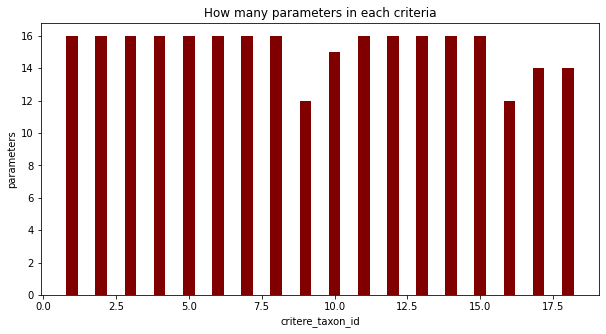

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(list(critere_taxon_groups.groups.keys()),v, color ='maroon',width = 0.4)
plt.xlabel("critere_taxon_id")
plt.ylabel("parameters")
plt.title("How many parameters in each criteria")
plt.show()

> Correlation

In [ ]:
taxon_critere_parameter_alteration_groups = whole_data.groupby(by=['taxon_id', 'critere_taxon_id', 'parameter', 'alteration_id'])
print(f'There is {len(taxon_critere_parameter_alteration_groups.groups)} unique (taxon_id, critere_taxon_id) groups')

There is 77092 unique (taxon_id, critere_taxon_id) groups


In [ ]:
print(taxon_critere_parameter_alteration_groups.sample(1)[['taxon_value', 'alteration_value']])

          taxon_value  alteration_value
3156721           1.0                 1
15368598          3.0                 2
1288469          17.0                 1
2513479           1.0                 4
6505178           1.0                 2
...               ...               ...
12188210         67.0                 4
12187953         67.0                 2
12188981         67.0                 4
2338633          71.0                 4
12188724         67.0                 4

[77092 rows x 2 columns]


In [ ]:
len_groups = taxon_critere_parameter_alteration_groups.apply(len)
pd.DataFrame({'len_groups':len_groups}).describe()

,len_groups
count,77092.000000
mean,200.703834
std,931.688073
min,1.000000
25%,2.000000
50%,9.000000
75%,62.000000
max,27888.000000


Since some groups only have few measurements, we cannot construct our analysis on them because the correlation is strongly affected by the number of measurements we have.<br><br>
Hence, we will drop these groups and focus only on the ones that have a length greater than the median length

In [ ]:
reduced_whole_data = taxon_critere_parameter_alteration_groups.filter(lambda g: (len(g) > len_groups.quantile(0.5)))
reduced_whole_data

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,taxon_value,parameter,param_value,unity,alteration_id,alteration_value,date_prel,station_id,nom_masse_eau,date_year
0,1294,1292.0,3525217,7,0.10,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
1,1132,1131.0,3525217,7,7.00,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
2,1155,1154.0,3525217,7,0.05,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
3,1564,1562.0,3525217,7,0.05,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
4,1159,1158.0,3525217,7,0.20,1302,5.371667,264,1,4,2007-08-09,404353.0,L'ELORN ET SES AFFLUENTS DEPUIS LA RETENUE DU ...,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15472655,1033,1032.0,3593633,1,1.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472656,189,20386.0,3593633,1,1.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472657,239,238.0,3593633,1,11.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0
15472658,443,399.0,3593633,1,4.00,1305,49.333333,162,13,4,2009-08-18,416171.0,L'Isere de la confluence avec le Drac a la con...,2009.0


In [ ]:
taxon_critere_parameter_alteration_groups = reduced_whole_data.groupby(by=['taxon_id', 'critere_taxon_id', 'parameter', 'alteration_id'])
print(f'Now, there is {len(taxon_critere_parameter_alteration_groups.groups)} unique (taxon_id, critere_taxon_id) groups')

Now, there is 37769 unique (taxon_id, critere_taxon_id) groups


In [ ]:
taxon_list = []
taxon_parent_list = []
ff_list = []
param_list = []
critere_list = []
alteration_list = []
corrs = []
for taxon_id, critere_name, param_name, alteration_id in taxon_critere_parameter_alteration_groups.groups.keys():
    group_df = taxon_critere_parameter_alteration_groups.get_group((taxon_id, critere_name, param_name, alteration_id))
    corr = group_df['alteration_value'].corr(group_df['taxon_value'])
    taxon_list.append(taxon_id)
    taxon_parent_list.append(group_df.taxon_parent_id.values[0])
    ff_list.append(group_df.list_ff_id.values[0])
    param_list.append(param_name)
    critere_list.append(critere_name)
    alteration_list.append(alteration_id)
    corrs.append(corr)

taxon_critere_param_alteration_corr = pd.DataFrame({'taxon_id':taxon_list, 'taxon_parent_id':taxon_parent_list, 'list_ff_id':ff_list, 'critere_taxon_id':critere_list, 'parameter':param_list, 'alteration_id':alteration_list, 'corr':corrs})

In [ ]:
correlated_data = taxon_critere_param_alteration_corr.loc[abs(taxon_critere_param_alteration_corr['corr']) > 0.5]
correlated_data

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,parameter,alteration_id,corr
270,122,115.0,3583276,1,1305,13,0.713250
369,155,20539.0,3575852,1,1314,9,-0.523066
1291,249,248.0,3576679,1,1314,9,0.555452
1378,264,263.0,3576284,1,1345,14,-0.529338
1379,264,263.0,3576284,1,1347,14,-0.606646
...,...,...,...,...,...,...,...
37367,31041,31334.0,3652477,10,1335,10,0.590553
37573,31135,2084.0,3676631,3,1312,6,0.638222
37744,32235,6598.0,3542337,1,1302,6,0.658132
37761,33829,9356.0,3545436,1,1302,1,0.693285


In [ ]:
sorted(correlated_data.critere_taxon_id.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18]

The only `critere_taxon_id` that aren't correlated to any `parameter` are `9` and `16`

In [ ]:
all_taxon_ids = reduced_whole_data.taxon_id.unique()
corr_taxon_ids = correlated_data.taxon_id.unique()
print(f'we were able to extract correlated parameters to taxon\'s criterias for {len(corr_taxon_ids)} taxons out of {len(all_taxon_ids)} ({len(corr_taxon_ids)/len(all_taxon_ids)*100:.2f}%)')

we were able to extract correlated parameters to taxon's criterias for 286 taxons out of 1618 (17.68%)


In [ ]:
corr_taxon_critere_groups = correlated_data.groupby(['taxon_id', 'critere_taxon_id'])
taxon_critere_groups = reduced_whole_data.groupby(['taxon_id', 'critere_taxon_id'])
print(f'We were able to characterize {len(corr_taxon_critere_groups.groups)} out of {len(taxon_critere_groups.groups)} (taxon_id, critere_taxon_id) [{len(corr_taxon_critere_groups.groups)/len(taxon_critere_groups.groups)*100:.2f}%]')

We were able to characterize 321 out of 2149 (taxon_id, critere_taxon_id) [14.94%]


In total, until this point, we're able to analyse the dependency between 17% of `taxons` and their `physiochemical parameters`)

Let's extract the most correlated parameters with each `(taxon_id, critere_taxon_id)`

In [ ]:
corr_taxon_critere_groups = correlated_data.groupby(['taxon_id', 'critere_taxon_id'])
indexes = []
for taxon_id, critere in corr_taxon_critere_groups.groups.keys():
    indexes.append(corr_taxon_critere_groups.get_group((taxon_id, critere))['corr'].abs().idxmax())
    
max_corr_per_taxon_critere = correlated_data.loc[indexes]

In [ ]:
max_corr_per_taxon_critere

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,parameter,alteration_id,corr
270,122,115.0,3583276,1,1305,13,0.713250
369,155,20539.0,3575852,1,1314,9,-0.523066
1291,249,248.0,3576679,1,1314,9,0.555452
1379,264,263.0,3576284,1,1347,14,-0.606646
1508,284,3146.0,3598290,1,1302,1,0.657260
...,...,...,...,...,...,...,...
37170,30105,1116.0,3530097,7,1345,14,0.524790
37366,31041,31334.0,3652477,10,1335,3,0.590553
37573,31135,2084.0,3676631,3,1312,6,0.638222
37744,32235,6598.0,3542337,1,1302,6,0.658132


In [ ]:
max_corr_per_taxon_critere.loc[max_corr_per_taxon_critere.taxon_id == random.choice(max_corr_per_taxon_critere.taxon_id.values)]

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,parameter,alteration_id,corr
34168,14458,10020.0,3535007,1,1372,14,0.819737


> `NaN` correlation:

In [ ]:
nan_corr = taxon_critere_param_alteration_corr.loc[taxon_critere_param_alteration_corr['corr'].isna()]
taxon_critere_parameter_alteration_groups.get_group((nan_corr.taxon_id.values[0], nan_corr.critere_taxon_id.values[0], nan_corr.parameter.values[0], nan_corr.alteration_id.values[0]))

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,taxon_value,parameter,param_value,unity,alteration_id,alteration_value,date_prel,station_id,nom_masse_eau,date_year
2347256,1,22602.0,3602212,1,7.0,1339,0.030000,162,10,2,2011-07-19,400872.0,La Mimente de sa source au confluent du Tarnon,2011.0
2513739,1,22602.0,3602059,1,1.0,1339,0.030000,162,10,2,2011-08-10,401076.0,Ruisseau de Roques,2011.0
2513781,1,22602.0,3602060,1,3.0,1339,0.030000,162,10,2,2011-08-10,401076.0,Ruisseau de Roques,2011.0
2575796,1,22602.0,3602080,1,1.0,1339,0.030000,162,10,2,2011-08-11,401137.0,Le Nert,2011.0
3157199,1,22602.0,3594996,1,1.0,1339,0.058333,162,10,2,2010-09-02,401861.0,LA LOIRE DEPUIS LE COMPLEXE DE GRANGENT JUSQU'...,2010.0
3157205,1,22602.0,3594997,1,6.0,1339,0.058333,162,10,2,2010-09-02,401861.0,LA LOIRE DEPUIS LE COMPLEXE DE GRANGENT JUSQU'...,2010.0
3157209,1,22602.0,3594998,1,1.0,1339,0.058333,162,10,2,2010-09-02,401861.0,LA LOIRE DEPUIS LE COMPLEXE DE GRANGENT JUSQU'...,2010.0
3429106,1,22602.0,3628271,1,1.0,1339,0.049091,162,10,2,2012-08-07,402035.0,L'ARROUX ET SES AFFLUENTS DEPUIS LA SOURCE JUS...,2012.0
6102487,1,22602.0,3629707,1,1.0,1339,0.047500,162,10,2,2012-08-21,403130.0,LA VAUDELLE ET SES AFFLUENTS DEPUIS LA SOURCE ...,2012.0
6505652,1,22602.0,3629717,1,1.0,1339,0.130833,162,10,2,2012-07-05,403324.0,LE BRIONNEAU ET SES AFFLUENTS DEPUIS LA SOURCE...,2012.0


In [ ]:
print(f'{len(nan_corr)} (taxon_id, critere_taxon_id, parameter, alteration_id) have the same `alteration_value`')

7954 (taxon_id, critere_taxon_id, parameter, alteration_id) have the same `alteration_value`


In [ ]:
nan_corr_taxon_critere_groups = nan_corr.groupby(['taxon_id', 'critere_taxon_id'])

corr_taxon_critere_array = np.array(list(map(list, corr_taxon_critere_groups.groups.keys())))
nan_corr_taxon_critere_array = np.array(list(map(list, nan_corr_taxon_critere_groups.groups.keys())))

taxon_critere_df = pd.DataFrame({'taxon_id':corr_taxon_critere_array[:,0], 'critere_taxon_id':corr_taxon_critere_array[:,1], 'corr':[True]*len(corr_taxon_critere_array)})
taxon_critere_df = pd.concat([taxon_critere_df, pd.DataFrame({'taxon_id':nan_corr_taxon_critere_array[:,0], 'critere_taxon_id':nan_corr_taxon_critere_array[:,1], 'corr':[False]*len(nan_corr_taxon_critere_array)})])
nb_duplicated_rows = taxon_critere_df[['taxon_id', 'critere_taxon_id']].duplicated().sum()
print(f'we were able to characterize {nb_duplicated_rows} (taxon_id, critere_taxon_id) out of {len(nan_corr_taxon_critere_groups.groups)} from those who have `NaN` correlation values')

we were able to characterize 300 (taxon_id, critere_taxon_id) out of 2077 from those who have `NaN` correlation values


As we can see, all `(taxon_id, critere_taxon_id)` (`2149`) have some parameters with fixed `alteration_value`.<br>
These parameters for these specific `(taxon_id, critere_taxon_id)` should be ignored because they can't bring any information to our analysis

> Understand Results

Now, we want to check whether there is some `critere_taxon_id` that are directly affected by a `physiochemical parameter` regardless of the `biological taxon` the species belong to

In [ ]:
max_corr_critere_groups = max_corr_per_taxon_critere.groupby('critere_taxon_id')
print(max_corr_critere_groups.parameter.unique().apply(len))

critere_taxon_id
1     16
2      2
3      5
4      6
5      7
6      4
7     12
8      3
10     5
11     3
12     6
13     2
14     2
15     2
17     4
18     1
Name: parameter, dtype: int64


We can see that a `critere_taxon_id` can be correlated with multiple `parameters`.<br>
But **most of them** are only affected by **few** parameters

Does it depend on `taxon_parent_id` ?

In [ ]:
max_corr_critere_taxon_parent_groups = max_corr_per_taxon_critere.groupby(['critere_taxon_id', 'taxon_parent_id'])
len_groups = max_corr_critere_taxon_parent_groups.parameter.unique().apply(len)
print(f'Are all groups (critere_taxon_id, taxon_parent_id) affected by one unique parameter: {all(len_groups == 1)} ({(len_groups == 1).sum()/len(len_groups)*100:.2f})')

Are all groups (critere_taxon_id, taxon_parent_id) affected by one unique parameter: False (87.19)


Does it depend on `list_ff_id` ?

In [ ]:
max_corr_critere_ff_groups = max_corr_per_taxon_critere.groupby(['critere_taxon_id', 'list_ff_id'])
len_groups = max_corr_critere_ff_groups.parameter.unique().apply(len)
print(f'Are all groups (critere_taxon_id, taxon_parent_id) affected by one unique parameter: {all(len_groups == 1)} ({(len_groups == 1).sum()/len(len_groups)*100:.2f})')

Are all groups (critere_taxon_id, taxon_parent_id) affected by one unique parameter: False (95.67)


We can conclude that the analysis we did on the `(taxon_id, critere_taxon_id)` allows characterizing `liste_faunistique_floristique`

# Temporal Correlation

We want to verify whether there is a correlation between time and taxon's parameters.<br>
We will only consider tha most correlated parameters with `(taxon_id, critere_taxon_id)`, since these parameters are the most interesting ones to characterize the evolution of the biological species.

In [ ]:
taxon_list = []
taxon_parent_list = []
ff_list = []
param_list = []
critere_list = []
alteration_list = []
corrs_time = []
corrs = []

for taxon_id, taxon_parent_id, list_ff_id, critere_id, param, alteration_id, corr in max_corr_per_taxon_critere.itertuples(index=False):
    group_df = taxon_critere_parameter_alteration_groups.get_group((taxon_id, critere_id, param, alteration_id))
    corr_time = group_df['alteration_value'].corr(group_df['date_prel'].astype(int))
    taxon_list.append(taxon_id)
    taxon_parent_list.append(taxon_parent_id)
    ff_list.append(list_ff_id)
    critere_list.append(critere_name)
    param_list.append(param_name)
    alteration_list.append(alteration_id)
    corrs.append(corr)
    corrs_time.append(corr_time)
    
taxon_critere_param_alteration_corr_time = pd.DataFrame({'taxon_id':taxon_list, 'taxon_parent_id':taxon_parent_list, 'list_ff_id':ff_list, 'critere_taxon_id':critere_list, 'parameter':param_list, 'alteration_id':alteration_list, 'corr_value':corrs, 'corr_time':corrs_time})

In [ ]:
taxon_critere_param_alteration_corr_time.loc[abs(taxon_critere_param_alteration_corr_time.corr_time) > 0.5]

,taxon_id,taxon_parent_id,list_ff_id,critere_taxon_id,parameter,alteration_id,corr_value,corr_time
6,310,20713.0,3589679,1,1374,9,0.631072,-0.520382
21,611,610.0,3602110,1,1374,9,0.553294,-0.685152
36,747,20518.0,3598314,1,1374,3,0.790742,-0.631827
42,871,870.0,3644267,1,1374,11,0.528287,-0.543660
46,881,880.0,3597360,1,1374,9,0.751573,-0.520632
48,912,908.0,3607835,1,1374,6,0.906470,-0.591996
50,915,914.0,3576699,1,1374,3,0.708492,-0.680748
55,998,31141.0,3576700,1,1374,9,0.687811,0.716292
58,1050,5125.0,3581165,1,1374,14,0.531907,-0.788294
64,1117,1116.0,3529964,1,1374,14,0.869469,0.510764


Only the criteria which id is `1` is correlated with `date_prel`